# Import libs and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv('top10s.csv', engine='python')
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
df.shape

(603, 14)

## Columns

In [9]:
df.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

- **title** (str) Song's title
- **artist** (str) Song's artist
- **top genre** (str) genre of the track
- **year** (int) year in the billboard
- **bpm** (int) beat per minute
- **nrgy** (int) energy - higher -> more energetic
- **dnce** (int) danceability - higher -> easier to dance
- **dB** (int) loudness
- **live** (int) liveness - higher -> more likely to live record
- **val** (int) valence - higher -> more positive mood
- **dur** (int) duration in second
- **acous** (int) acousticness - higher -> more acoustic
- **spch** (int) speechiness - higher -> more spoken contains
- **pop** (int) pop - higher -> more popular

In [10]:
param_cols = ['nrgy', 'dnce', 'live', 'val', 'acous', 'spch', 'pop']

# EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
title        603 non-null object
artist       603 non-null object
top genre    603 non-null object
year         603 non-null int64
bpm          603 non-null int64
nrgy         603 non-null int64
dnce         603 non-null int64
dB           603 non-null int64
live         603 non-null int64
val          603 non-null int64
dur          603 non-null int64
acous        603 non-null int64
spch         603 non-null int64
pop          603 non-null int64
dtypes: int64(11), object(3)
memory usage: 66.0+ KB


In [13]:
df.isnull().sum().sum()

0

In [14]:
df[param_cols].describe()

,nrgy,dnce,live,val,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,70.504146,64.379768,17.774461,52.225539,14.326700,8.358209,66.520730
std,16.310664,13.378718,13.102543,22.513020,20.766165,7.483162,14.517746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,57.000000,9.000000,35.000000,2.000000,4.000000,60.000000
50%,74.000000,66.000000,12.000000,52.000000,6.000000,5.000000,69.000000
75%,82.000000,73.000000,24.000000,69.000000,17.000000,9.000000,76.000000
max,98.000000,97.000000,74.000000,98.000000,99.000000,48.000000,99.000000


There is something strange in data exploration. The `acous` has quite skewed distribution. In other words, its Q1, Q2, and Q3 values (25%, 50%, and 75% respectively) are quite small in comparison to its max value at 99. In addition, its std is just 20.76 which is not big comparing to `val` whose Q1, Q2, and Q3 are not much far from each other.

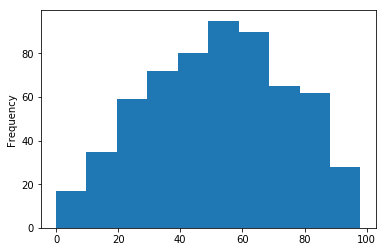

In [18]:
df['val'].plot.hist()

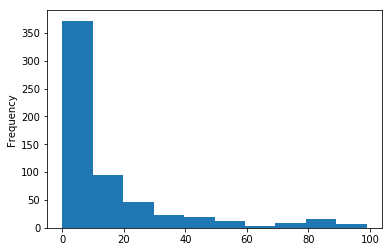

In [19]:
df['acous'].plot.hist()

As expected, the `acous` column is incredibly skewed. Apply log10 function to eliminate.

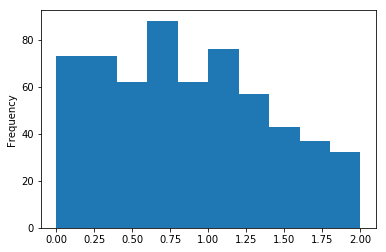

In [27]:
df['log_acous'] = np.log10(df['acous']+1)
df['log_acous'].plot.hist()

In [35]:
def plotHistCols(df_list, cols):
    try: 
        len(df_list)
    except:
        df_list = [df_list]
        
    for col in cols:
        plt.subplots(len(df_list))
        print(col)
        for df in df_list:
            df[col].plot.hist()
            plt.xlim([0, 100])
            plt.ylim([0, 400])
        plt.show()
plotHistCols(df, param_cols)

nrgy


TypeError: string indices must be integers

Error in callback <function flush_figures at 0x000001E61AB041E0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
train = df.sample(frac=0.8, random_state=1)
test = df.drop(train.index)
plotHistCols(train, param_cols)